<h1><center>Simple Linear Regression</center></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li>Understanding the Data</li>
        <li>Reading the data in</li>
        <li>Data Exploration</li>
        <li>Simple Regression Model</li>
    </ol>
</div>
<br>
<hr>

## Importing Needed packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="reading_data">Reading the data in</h2>

In [4]:
df = pd.read_csv("http://bit.ly/w-data")

# take a look at the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [5]:
# summarize the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

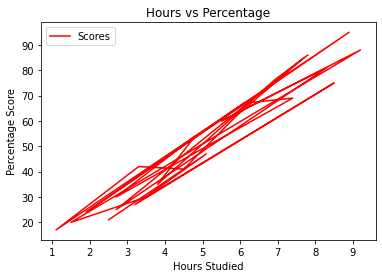

In [10]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='r')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

#### Creating train and test dataset

In [22]:
X = df.iloc[:, :-1].values  
y = df.iloc[:,1 ].values  

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [28]:
from sklearn.linear_model import LinearRegression  
regr = LinearRegression()  
regr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Text(0, 0.5, 'Score')

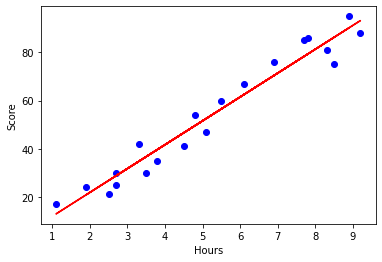

In [30]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regr.coef_*X_train + regr.intercept_, '-r')
plt.xlabel("Hours")
plt.ylabel("Score")

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [31]:
print(X_test) # Testing data - In Hours
y_pred = regr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [52]:
# You can also test with your own data
hours = np.asanyarray(float(input()))
hours = hours.reshape(-1,1)
own_pred = regr.predict(hours)
print("No of Hours = {}".format(*hours))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No of Hours = [9.25]
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
